##### Nama  : Nadifa Salsabila Purnomo #####
##### Nim   : 2209106044 #####
##### Kelas : Informatika A2 2022 #####
##### POSTTEST 5 KB #####

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

In [99]:
nana = pd.read_csv('Aemf1.csv')
nana

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [100]:
nana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

Melakukan data cleaning pada data nilai duplikat

In [101]:
nana.drop_duplicates(inplace=True)

##### A. Supervised Learning #####
##### A1. Mengimplementasikan metode #####

a. Support Vector Clustering dengan SVM

In [102]:
X2 = nana[['Person Capacity', 'Cleanliness Rating']]
y2 = nana['Room Type']

# Mengubah nilai yang bukan Room Type menjadi non-Room Type
y2 = np.where(y2 == 'Private room', 'Private room', 'Non-Private room')

Mengatur perbandingan training set dan test set menjadi 80:20

In [103]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.2, random_state=30
)

Melatih model SVC

In [104]:
svm = SVC(kernel="linear")
svm.fit(X_train2, y_train2)

SVC(kernel='linear')

In [105]:
y_pred2 = svm.predict(X_test2) # memprediksi dengan X_test dari nana

sv = svm.support_vectors_ # mengambil nilai support vector dari objek
sv

array([[ 2., 10.],
       [ 2.,  9.],
       [ 3., 10.],
       ...,
       [ 2.,  9.],
       [ 2., 10.],
       [ 2., 10.]])

b. Regression Linear

In [106]:
X = nana[['Person Capacity']]
y = nana['Cleanliness Rating']

Mengatur perbandingan training set dan test set menjadi 80:20

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

Melatih model regresi linear

In [108]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Melakukan prediksi

In [109]:
y_pred = reg.predict(X_test)

In [110]:
y_score = reg.score(X_test, y_test)
y_score

-1.7902106060008194e-05

##### A2. Hasil Prediksi #####

a. Mengklasifikasi

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as cr

In [112]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test2 ,y_pred2)
cm

array([[3924, 1772],
       [ 464, 2183]], dtype=int64)

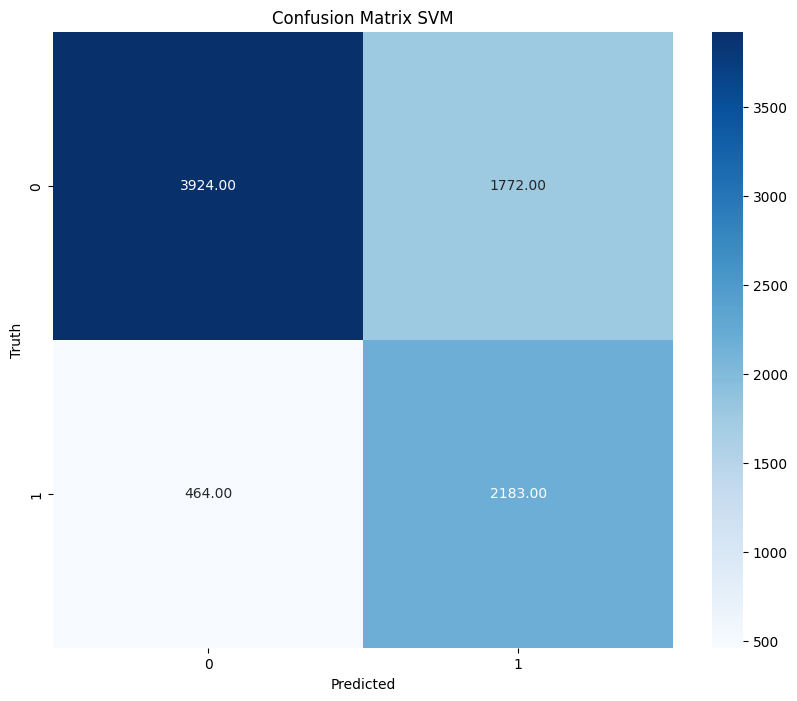

In [113]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix SVM')
plt.show()

In [114]:
result = cr(y_test2, y_pred2)
print(result)

                  precision    recall  f1-score   support

Non-Private room       0.89      0.69      0.78      5696
    Private room       0.55      0.82      0.66      2647

        accuracy                           0.73      8343
       macro avg       0.72      0.76      0.72      8343
    weighted avg       0.79      0.73      0.74      8343



Hasil prediksi diatas menunjukkan bahwa model klasifikasi memiliki kinerja yang relatif baik dalam mengklasifikasikan sampel sebagai "Non-Private room," dengan precision, recall, dan F1-score yang cukup baik. Namun, kinerjanya sedikit lebih rendah dalam mengklasifikasikan sampel sebagai "Private room," terutama dalam hal precision. Ini mungkin menunjukkan bahwa model memiliki kesulitan dalam mengidentifikasi kasus positif untuk kelas "Private room," dan perlu ditingkatkan atau disempurnakan untuk kelas tersebut.

b. Regresi

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from numpy import sqrt

In [116]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

# print (mae, mse, rmse, r2, sep='\n')
print(f" MAE {mae}\n MSE {mse}\n RMSE {rmse}\n R2 {r2}")

 MAE 0.6723156723399226
 MSE 0.802860446235132
 RMSE 0.8960248022432928
 R2 -1.7902106060008194e-05


Hasil prediksi diatas menggambarkan bahwa model regresi ini menunjukkan bahwa model tersebut memiliki kesalahan yang signifikan dalam memprediksi data target. Nilai MAE dan RMSE yang cukup tinggi menunjukkan bahwa kesalahan prediksi model relatif besar. Selain itu, nilai R2 yang mendekati nol mengindikasikan bahwa model ini tidak cocok dengan data dengan baik dan mungkin perlu disesuaikan atau digantikan dengan model regresi yang lebih baik.

##### A3. Plot Hasil Prediksi #####

a. Menggunakan SVM

c:\Users\NADIFA SALSABILA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Cleanliness Rating')

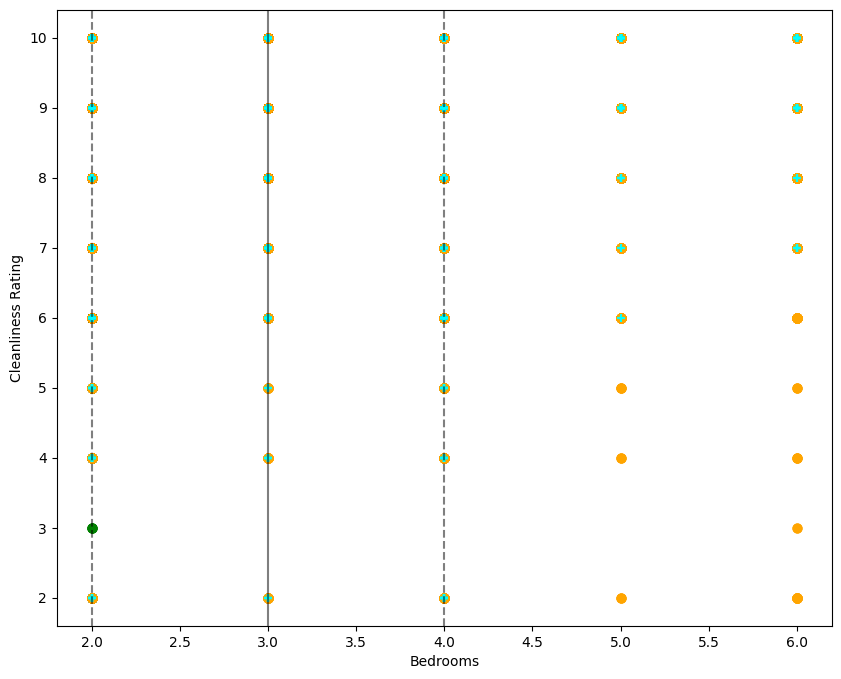

In [117]:
plt.figure(figsize=(10,8))

# Plot data points dari Amsterdam
plt.scatter(X2[y2 == 'Private room'].iloc[:,0], 
            X2[y2 == 'Private room'].iloc[:,1], 
            s=40, c='green', marker='o', label='Private room')

# Plot data points dari non-Amsterdam
plt.scatter(X2[y2 == 'Non-Private room'].iloc[:,0],
            X2[y2 == 'Non-Private room'].iloc[:,1],
            s=40, c='orange', marker='o', label='Non-Private room')

# Menampilkan Titik-Titik Support Vectors-nya
plt.scatter(sv[:, 0], sv[:, 1], s=40,
color='cyan', marker='+', label='Support Vectors')

# Membuat garis Decision Boundary (Ruang Keputusan)
ax = plt.gca() # gca() = "Get Current Axes"
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Membuat sebuah meshgrid untuk evaluasi model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), # Linear Space x
np.linspace(ylim[0], ylim[1])) # Linear Space y
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()]) # Concatenate
Z = Z.reshape(xx.shape) # Reshape titik agar sesuai dengan sumbu x

# Membuat grafik Decision Boundary dan garis Marginnya
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,

linestyles=['--', '-', '--'])

#Plot data points dari support vector
# plt.scatter()

plt.xlabel("Bedrooms")
plt.ylabel("Cleanliness Rating")

b. Menggunakan regresi linear

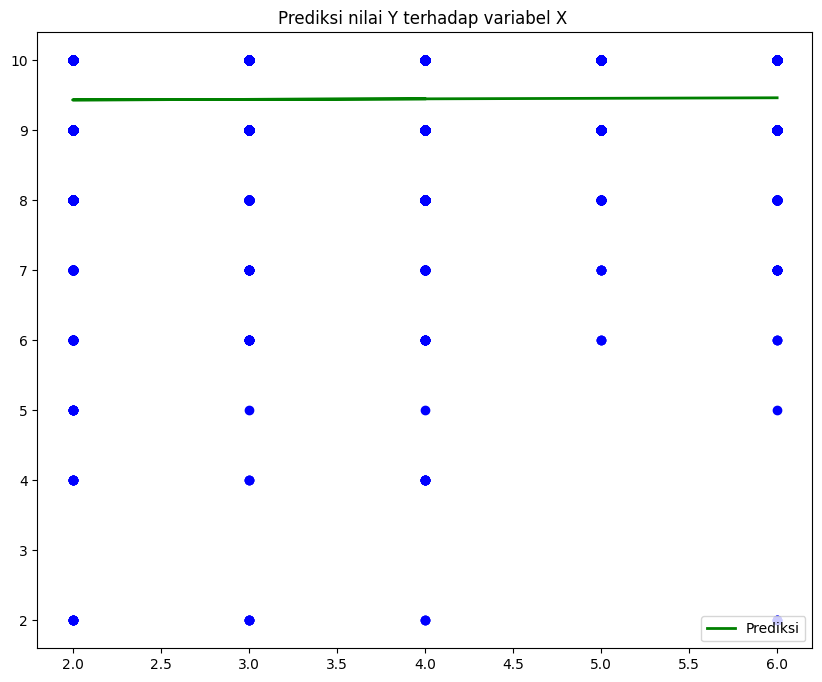

In [118]:
plt.figure(figsize=(10,8))
plt.scatter (x=X_test, y=y_test, c="blue") # c = color
plt.plot(X_test, y_pred, c="green", linewidth=2, label='Prediksi')
plt.legend(loc='lower right') #loc = lokasi (upper/lower)
plt.title('Prediksi nilai Y terhadap variabel X ')
plt.show()

B. Unsupervised Learning

##### B1. Mengimplementasikan metode K_MEANS #####

In [119]:
X = nana[['Person Capacity', 'Cleanliness Rating']]
K = 2

kmeans = KMeans(n_clusters=K, n_init=10) 
kmeans.fit(X)

cluster_labels = kmeans.labels_
nana["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_
cluster_mapping = {0: 1, 1: 0}
nana['cluster'] = nana['cluster'].map(cluster_mapping)

##### B2. Cluster yang telah diprediksi #####

a. Tanpa label asli

In [120]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [121]:
# Menghitung metrik-metrik klastering
def calculate_clustering_metrics(X, labels):
    ss_score = silhouette_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    ch_index = calinski_harabasz_score(X, labels)
    return ss_score, db_index, ch_index

# label klastering
labels = nana['cluster']

# Hitung metrik-metrik klastering
ss, db, ch = calculate_clustering_metrics(X, labels)

# Print hasil metrik klastering
print(f"Silhouette Score: {ss:.2f}")
print(f"Davies-Bouldin Index: {db:.2f}")
print(f"Calinski-Harabasz Index: {ch:.2f}")

Silhouette Score: 0.55
Davies-Bouldin Index: 0.79
Calinski-Harabasz Index: 46665.22


Hasil prediksi diatas menggambarkan bahwa clustering ini tampaknya sangat baik. Nilai Silhouette Score yang tinggi menunjukkan bahwa kelompok-kelompok dalam partisi data saling serupa, sedangkan Davies-Bouldin Index dan Calinski-Harabasz Index yang rendah menunjukkan bahwa kelompok-kelompok dalam partisi data baik dalam terpisah satu sama lain dan memiliki variasi yang cukup besar antar-kelompok. Oleh karena itu, ini menunjukkan bahwa model clustering telah berhasil dalam mempartisi data menjadi kelompok-kelompok yang bermakna dan dapat dianggap sebagai hasil clustering yang baik.






b.Dengan label asli

Mengubah label lategorikal menjadi numerik

In [122]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah label kategorikal menjadi numerik
nana['Superhost'] = label_encoder.fit_transform(nana['Superhost'])

In [123]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score

In [124]:
true_labels = nana['Superhost']

# Evaluasi dengan metrik ARI
ari_score = adjusted_rand_score(true_labels, nana['Superhost'])
print(f"Adjusted Rand Index: {ari_score:.2f}")

# Evaluasi dengan metrik NMI
nmi_score = normalized_mutual_info_score(true_labels, nana['Superhost'])
print(f"Normalized Mutual Information: {nmi_score:.2f}")

# Evaluasi dengan metrik homogeneity
homogeneity = homogeneity_score(true_labels, nana['Superhost'])
print(f"Homogeneity: {homogeneity:.2f}")

# Evaluasi dengan metrik completeness
completeness = completeness_score(true_labels, nana['Superhost'])
print(f"Completeness: {completeness:.2f}")

Adjusted Rand Index: 1.00
Normalized Mutual Information: 1.00
Homogeneity: 1.00
Completeness: 1.00


Hasil prediksi diatas menggambarkan bahwa model clustering sangat baik dalam menghasilkan pengelompokan yang identik atau sangat mirip dengan pengelompokan referensi. Nilai-nilai kesamaan yang mencapai 1.00 menunjukkan bahwa partisi data yang dihasilkan oleh model adalah hasil clustering yang sangat baik dan sangat sesuai dengan pengelompokan referensi.

##### B3. Plot Hasil CLustering #####

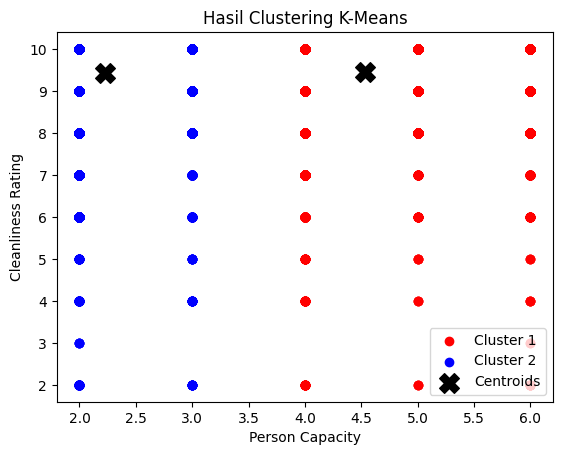

In [125]:
figsize=(10,6)
X = nana[['Person Capacity', 'Cleanliness Rating']]

# Plot data untuk setiap cluster
plt.scatter(X[nana['cluster'] == 0]['Person Capacity'],
            X[nana['cluster'] == 0]['Cleanliness Rating'],
            c='red', label='Cluster 1')
plt.scatter(X[nana['cluster'] == 1]['Person Capacity'],
            X[nana['cluster'] == 1]['Cleanliness Rating'],
            c='blue', label='Cluster 2')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X',
            s=200, c='black', label='Centroids')

plt.xlabel('Person Capacity')
plt.ylabel('Cleanliness Rating')
plt.title('Hasil Clustering K-Means')
plt.legend()
plt.show()